# Name : **Meghraj Prajapat**
# Roll number : **23M1583**

# This is a Single Notebook which has two parts
## Part(1) -> Here I have put all the necessary modified functions which were used to solve problems.
## Part(2) -> In this part I have solved HW2B problems.

In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
#import sys, os

# Disable
#def blockPrint():
#    sys.stdout = open(os.devnull, 'w')

# Restore
#def enablePrint():
#   sys.stdout = sys.__stdout__

In [ ]:
# from FormStiff1D import FormStiff1D
# from ShapeFunctions import shape_barln

In [ ]:
import numpy as np
from sympy import *
import math
import matplotlib.pyplot as pt

# Part(1)

In [ ]:
import numpy as np                        # to import all the mathematical functions and arrays
from scipy.special import roots_legendre  # to import the function which evaluates the Gauss points and weights

def FormNodLoad1D(nodal_data, ndof, ngauss, ld, shape_barl):
   # for       i=0 [0,0.2], gauss points, for i=0,[38.22, 38.22](load at left and right node) , function

    #------------------Function Definition -----------------------------------#
    #-------------------------------------------------------------------------#
    # let nodal data
    # ngauss ->
    # ld -> load vector....
    # shape_barl -> Function to calculate local source vector

    l = nodal_data[-1,0] - nodal_data[0,0]  # length of a single element
    nnodcon = len(nodal_data)               # number of nodes for an element
    force = np.zeros([nnodcon*ndof,1])      # ndof =1 , always for 1D bar
    if ndof==1:
      if ngauss == 0:
        force = shape_barl(l,ld.mean())
      elif ngauss ==1:
        print('')
      elif ngauss==2:
        print('')
      pass


    else:
      # beam problem, ngauss = 2
      print('beam load defined (distributed)')
      lc_coord, weight = roots_legendre(ngauss)  # for ngauss=2, lc_coord =>[-0.57735027,  0.57735027], weigth => [1., 1.]
      x=symbols('x')
      N = shape_barl(l,x,ld)   #ld = function
      K1 = np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(N)+np.vectorize(lambda expr: expr.subs(x,lc_coord[1]))(N)
      force = (l/2)*K1.astype(np.float64)    # [1,4]


    return force


In [ ]:
def beam_load(l,x,ld):

  z=symbols('z')
  P0=np.array([1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2])
  P1=P0*ld
  P = np.vectorize(lambda expr: expr.subs(z,l/2*(1+x)))(P1)
  N= np.array([P])
  return N


In [ ]:
def shape_barl(l,EA,*_):    #  - function handle for local stiffness matrix
  stiff = (EA/l)*np.array([[1,-1],[-1,1]])  # Local stiffness matrix for an element
  return stiff

In [ ]:
def load_barl(l,q,*_):     # load_barl
  force = (q*l/2)*np.array([[1],[1]])
  return force

In [ ]:
def shape_heatl(l,kA,ph):
  K1 = (ph*l/6)*np.array([[2,1],[1,2]])
  K2 =(kA/l)*np.array([[1,-1],[-1,1]])
  stiff =K1+K2

  return stiff

In [ ]:
def shape_heatq(l,kA,ph):
  K1= (ph*l/30)*np.array([[4,2,-1],[2,16,2],[-1,2,4]])
  K2=(kA/(3*l))*np.array([[7,-8,1],[-8,16,-8],[1,-8,7]])
  stiff =K1+K2
  return stiff

In [ ]:
import numpy as np    # to import all the mathematical functions and arrays
from scipy.special import roots_legendre # to import the function which evaluates the Gauss points and weights

def FormStiff1D(ndof, nodal_data, eleconnect, shape_barl):
             # for i=0 [0,0.2] , [ 10^8, 10^8 ,0,0,0],

    #----------------- Function Definition -----------------------------------#
    # Function takes degrees of freedom, nodal data, element connectivity (Matdata and gauss points), and
    # shape function as input to return the local stiffness matrix as output
    #-------------------------------------------------------------------------#
    # shape_barl : Function handle for calculating local stiffness matrix
    ngauss = eleconnect[-1].astype(int)
    print(f"gauss points are {ngauss}")
    nnodcon = nodal_data.shape[0]
    l = nodal_data[-1,0] - nodal_data[0,0]  # local element length
    if ndof==1:
      # bar problem
      if ngauss == 0:
        stiff = shape_barl(l,eleconnect[:nnodcon].mean(),eleconnect[nnodcon:2*nnodcon].mean())
                  # local element length , EAmean for element (mean of 3rd and 4th value) , 0
      elif ngauss==1:
        print("bar problem with 1 gauss points")

        lc_coord, weight = roots_legendre(ngauss)
        stiff = np.zeros((nnodcon*ndof, nnodcon*ndof))
        x=symbols('x')
        C = shape_barl(l,x)
        EA =eleconnect[:nnodcon].mean()
        stiff1= (l/2*EA)*(np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(C)*2)
        stiff =stiff1.astype(np.float64)




      elif ngauss==2:
        if eleconnect[nnodcon:2*nnodcon].mean() ==0:
          print("bar problem with 2 gauss points")
          lc_coord, weight = roots_legendre(ngauss)
          stiff = np.zeros((nnodcon*ndof, nnodcon*ndof))
          x=symbols('x')
          C= shape_barl(l,x)
          EA =eleconnect[:nnodcon].mean()
          stiff1= (l/2*EA)*(np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(C)*weight[0]+np.vectorize(lambda expr: expr.subs(x,lc_coord[1]))(C)*weight[1])
          stiff =stiff1.astype(np.float64)
        else:
          print('Quadratic Bar heat transfer with 2 gauss points')
          lc_coord, weight = roots_legendre(ngauss)
          stiff = np.zeros((nnodcon*ndof, nnodcon*ndof))
          x=symbols('x')
          C ,C1= shape_barl(l,x)
          EA =eleconnect[:nnodcon].mean()
          ph = eleconnect[nnodcon:2*nnodcon].mean()
          stiff1= (l/2*EA)*(np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(C)*weight[0]+np.vectorize(lambda expr: expr.subs(x,lc_coord[1]))(C)*weight[1])
          stiff2 =((l/2)*ph)*(np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(C1)*weight[0]+np.vectorize(lambda expr: expr.subs(x,lc_coord[1]))(C1)*weight[1])
          stiff =stiff1.astype(np.float64) +stiff2.astype(np.float64)

      elif ngauss==3:
        if eleconnect[nnodcon:2*nnodcon].mean() ==0:
          print('Quadratic Bar with 3 gauss points')
          lc_coord, weight = roots_legendre(ngauss)
          stiff = np.zeros((nnodcon*ndof, nnodcon*ndof))
          x=symbols('x')
          C,_ = shape_barl(l,x)
          EA =eleconnect[:nnodcon].mean()
          stiff1= (l/2*EA)*(np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(C)*weight[0]+np.vectorize(lambda expr: expr.subs(x,lc_coord[1]))(C)*weight[1]+
                   np.vectorize(lambda expr: expr.subs(x,lc_coord[2]))(C)*weight[2])
          stiff =stiff1.astype(np.float64)
        else:
          print('Quadratic Bar heat transfer with 3 gauss points')
          lc_coord, weight = roots_legendre(ngauss)
          stiff = np.zeros((nnodcon*ndof, nnodcon*ndof))
          x=symbols('x')
          C ,C1= shape_barl(l,x)
          EA =eleconnect[:nnodcon].mean()
          ph = eleconnect[nnodcon:2*nnodcon].mean()
          stiff1= (l/2*EA)*(np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(C)*weight[0]+np.vectorize(lambda expr: expr.subs(x,lc_coord[1]))(C)*weight[1]+
                   np.vectorize(lambda expr: expr.subs(x,lc_coord[2]))(C)*weight[2])
          stiff2 =((l/2)*ph)*(np.vectorize(lambda expr: expr.subs(x,lc_coord[0]))(C1)*weight[0]+np.vectorize(lambda expr: expr.subs(x,lc_coord[1]))(C1)*weight[1]+
                   np.vectorize(lambda expr: expr.subs(x,lc_coord[2]))(C1)*weight[2])
          stiff =stiff1.astype(np.float64) +stiff2.astype(np.float64)


    else:
      # beam Problem
      if ngauss == 2:
        print('beam Stiffness is defined')
        lc_coord, weight = roots_legendre(ngauss)
        stiff = np.zeros((nnodcon*ndof, nnodcon*ndof))
        z = symbols('z')
        EI =eleconnect[:nnodcon].mean()
        N , ddN = shape_barl(l,z)
        K = np.matmul(ddN.T, ddN)
        K1 = np.vectorize(lambda expr: expr.subs(z,lc_coord[0]))(K) + np.vectorize(lambda expr: expr.subs(z,lc_coord[1]))(K)
        stiff = (8*EI/(l**3))*K1.astype(np.float64)
      else:
        print("No condition of Gauss Points follow")

    return stiff

In [ ]:
# Linear Lagrange Shape Function

import numpy as np
from sympy import *
import math

def shape_barln(l, x):

    #------------------- Function Definition ---------------------------------#
    # Function takes length of the element and gauss point as input and
    # returns the linear Lagrange shape function and derivative as output

    # Since there is no need for additional variables for postprocessing, the
    # input variable ch is ignored
    #-------------------------------------------------------------------------#

    #-------------------- Output Variables -----------------------------------#
    # N  : Linear Lagrange shape functions
    # dN : First derivative of shape functions
    # Np : This returns the geometric interpolation    ##?
    #-------------------------------------------------------------------------#

    # WRITE DOWN THE SHAPE FUNCTION AND THE FIRST DERIVATIVE
    # USE l TO TAKE INTO ACCOUNT THE JACOBIAN OF TRANSFORMATION FOR DERIVATIVES.
    z,lk,z1,z2,z3,L, Ax, xk =symbols('z lk z1 z2 z3 L Ax xk')
    N1 =1-z/l
    N2 =z/l
    N =[N1,N2]
    B=[]
    for i in range(2):

      K=diff(N[i],z)
      B.append(K)
    dN = np.array([B])
    C1 = np.matmul(dN.T,dN)
    C = np.vectorize(lambda expr: expr.subs(z,l/2*(1+x)))(C1)

    return C

# Quadratic Shape Function
def shape_barqn(l, x):

    #------------------- Function Definition ---------------------------------#
    # Function takes length of the element and gauss point as input and
    # returns the quadratric Lagrange shape function and derivative as output

    # Since there is no need for additional variables for postprocessing, the
    # input variable ch is ignored
    #-------------------------------------------------------------------------#

    #-------------------- Output Variables -----------------------------------#
    # N  : Quadratic Lagrange shape functions
    # dN : First derivative of shape functions
    # Np : This returns the geometric interpolation
    #-------------------------------------------------------------------------#

    # WRITE DOWN THE SHAPE FUNCTION AND THE FIRST DERIVATIVE
    # USE l TO TAKE INTO ACCOUNT THE JACOBIAN OF TRANSFORMATION FOR DERIVATIVES.
    z,z1,z2,z3,L =symbols('z z1 z2 z3 L')
    z1=0
    z2=l/2
    z3=l
    N1 =(z-z2)*(z-z3)/((z1-z2)*(z1-z3))
    N2 =(z-z1)*(z-z3)/((z2-z1)*(z2-z3))
    N3= (z-z1)*(z-z2)/((z3-z1)*(z3-z2))
    N =[N1,N2,N3]

    N0 =np.array([N])
    Nh=np.matmul(N0.T,N0)
    Cn=np.vectorize(lambda expr: expr.subs(z,l/2*(1+x)))(Nh)

    B=[]
    for i in range(3):
      K=diff(N[i],z)
      B.append(K)

    dN = np.array([B])

    C1 = np.matmul(dN.T,dN)
    C = np.vectorize(lambda expr: expr.subs(z,l/2*(1+x)))(C1)

    return C,Cn

# Hermite Cubic shape function
def shape_beamln(l, x):

    #------------------- Function Definition ----------------------------------#
    # Function takes length of the element and gauss point as input and
    # returns the shape function and derivative as output

    # In the case of a beam, we assume that the material properties are
    # interpolated linearly within the beam element. Further, for postprocessing
    # of data, we need the third derivative as output. So, we use a variable to
    # decide whether we are using the shape function for forming the stiffness
    # and load vector, or if we are interested in postprocessing.

    # ch : If choice is 1, then return N and B for stiffness matrix. Np for material properties
    #      If choice is 2, then return N and B for secondary variables, and ddN for third derivative (stored as Np)
    #---------------------------------------------------------------------------#

    #----------------------- Output Variables ----------------------------------#
    # N   : Hermite cubic shape functions
    # ddN : Second derivative of shape functions
    # Np  : This returns the geometric interpolation or third derivative depending upon input variable ch
    #---------------------------------------------------------------------------#

    # WRITE DOWN THE SHAPE FUNCTION AND THE SECOND DERIVATIVE
    # USE l TO TAKE INTO ACCOUNT THE JACOBIAN OF TRANSFORMATION FOR DERIVATIVES.
    #P= [(1/4)*(1-z**2)*(2+z), (l/8)*(1-z**2)*(1+z), (1/4)*(1+z**2)*(2-z),(-l/8)*((1+z)**2)*(1-z)]
    z=symbols('z')
    P1=[1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2]
    P = np.vectorize(lambda expr: expr.subs(z,l/2*(1+x)))(P1)

    N= np.array([P])
    B=[]
    B1=[]

    for i in range(4):
      K=diff(P[i],z)
      B.append(K)

    dN= np.array(B)
    for i in range(4):
      K1 = diff(dN[i],z)
      B1.append(K1)
    ddN = np.array([B1])
    ##if ch == 1:
        #Np = np.array([[(1-xi)/2, (1+xi)/2]])
    #else:
        # FILL IN THE THIRD DERIVATIVE OF THE SHAPE FUNCTION IN NP
        #Np = 0
    return N, ddN #, Np

In [ ]:


def Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, loadv, shape_barl, load_barl):

    # Static analysis of 1D ODEs (2nd and 4th order) using Linear Finite
    # Element Method.

    # The following parameters must be given to the code in order to
    # perform the necessary calculations. The ideal way is to generate an
    # input file from a meshing software and parse the information into the
    # specified variables using a separate MATLAB code. For 1D problems, the
    # input can be created by brute-force or a simple script.

    # -------------- Geometry, Material and load parameters --------------#

    # ndof       : Number of degrees of freedom per node
    #            : (1 for bar, 2 for beam)

    # nodal_data : Nodal coordinates data (matrix of variable size)
    #            : Node Number  | XCoord  |  YCoord (if Truss/Frame)  |  ZCoord(if 3D)

    # nnodconn   : Number of nodes in each element

    # eleconnect : Element Connectivity
    #            : Ele no.  |  nod. con.  |  Mat Data  | Gauss points

    # Mat data is (EA) or (kA)/(hP) or (EI) depending upon what problem you are solving.
    # The number of columns in this array is 3*nnodcon+2 - for each node in
    # the element, specify the relevant material properties:  (EA,0) or (kA,hP) or (EI,0)
    # gauss point takes care of interpolation of material properties in the element

    # fixeddofs  : nodes where primary variable is specified
    #            : Node no.  |  Xconst (Y const if Beam)  |  (theta constraint if Beam)  | Value (X/Y) | Value (theta constraint)
    #            : 1 implies constraint, 0 implies free dof
    #            : 1 can be either fixed or specified displacement

    # loadv      : distributed or concentrated loads
    #            : load_type  |  Ele no./Node no  |   Load (X if Bar/Y if Beam)  |  Load (Moment if Beam, dist. variation) | Gauss points
    # load_type  : 1 - point loads
    #            : 2 - distributed loads
    #            : 3 - Mixed Boundary condition

    # shape_barl         : Function handle for calculating local stiffness matrix
    # load_barl         : Function handle for calculating local source vector  (...............?)

    # --------------------------------------------------------------------#

    # -------------------------- Output ----------------------------------#
    # U          : Vector of primary variable (displacement/temperature/rotation) at each node
    # NV         : Vector of Neumann variable at each node (Reaction/Flux/Moment)
    # --------------------------------------------------------------------#

    # Number of nodes in the mesh
    nnode = nodal_data.shape[0]     # 6 nodes  , #2 5

    # Number of elements so that the stiffness matrix can be formed
    nelmts = eleconnect.shape[0]    # 5 elements ,#2   2

    # Total degrees of freedom for the model
    tdof = nnode*ndof    # 6*1 =6    , #2  5
    U = np.zeros([tdof,1])  # load vector 6 row 1 Col

    if ndof == 1 and nnodcon == 2:
        print('Second order ODE with linear Lagrange interpolation')
    elif ndof == 1 and nnodcon == 3:
        print('Second order ODE with quadratic Lagrange interpolation')
    elif ndof == 2 and nnodcon == 2:
        print('Fourth order ODE with Hermite cubic interpolation')
    else:
        raise ValueError('Wrong nodal connectivity and number of degrees of freedom. Check Input!')

    ## The main section of the FE code starts here:
    # You will have to write two subroutines FormStiff1D and FormNodLoad1D
    # that will return local stiffness matrix and load vector. Then
    # assemble them into the global array using element connectivity.

    # Step 1 : Form Global Stiffness Matrix

    Kstiff = np.zeros([tdof,tdof]) # global Matrix #2 5*5 matrix
    for i in range(nelmts):
        #i goes from 0 to n-1
        # Obtain local stiffness matrix
        # enodes -> current node connectivity i.e for first element enodes=[1,2]
        if ndof==1:
          enodes = eleconnect[i,1:(nnodcon+1)].astype(int)  # for i =0, [0,1]  , #2 [0,1,2]
          stiff = FormStiff1D(ndof, nodal_data[enodes,1:], eleconnect[i,(nnodcon+1):],shape_barl)   #2 should be 3*3
                              # for i=0   [0,0.2]    , [ 10^8, 10^8 ,0,0,0]
                              # 2  for i=0 [0,.25,.5] , [1,8,7,0,0,0,3]

        # ADD STIFF TO GLOBAL ELEMENT MATRIX. STEPS TO BE WRITTEN ARE:
        # 1) CREATE MAP FROM LOCAL TO GLOBAL NODE NUMBERS
        # 2) ADD LOCAL MATRIX TO GLOBAL STIFFNESS MATRIX
          Kstiff[np.ix_(enodes,enodes)] += stiff
        else:
          print('Assembling for beam problem')
          e1 = eleconnect[i,1:(nnodcon+1)].astype(int)
          enodes=np.array([e1[0]*2, e1[0]*2+1,e1[0]*2+2,e1[0]*2+3])
          stiff = FormStiff1D(ndof, nodal_data[e1,1:], eleconnect[i,(nnodcon+1):],shape_barl)
          Kstiff[np.ix_(enodes,enodes)] += stiff




    ## Step 2: Form global load vector, which consists of distributed load, point load, and any Robin/Mixed BCs
    # While forming the load vector, we use the fact that point loads can be added directly
    # to the load vector, whereas for distributed loads, we have to form the consistent load
    # vector and add it to the global load vector.

    loadvec = np.zeros([tdof,1])  # 6,1 for beam problem
    for i in range(loadv.shape[0]):
        if loadv[i,0] == 1:
            print('Point Loads specified')
            if ndof==1:
              node_num= loadv[i,1].astype(int)
              loadvec[node_num] +=loadv[i,2]
                    #node          load
            else:
              #point loads for beam
              node_num=loadv[i,1]
              loadvec[node_num*2]+=loadv[i,2]    #to add point load at 0 , 2, 4..
              loadvec[node_num*2+1]+=loadv[i,3]  #to add moment at 1,3,5...



            ####### ADD POINT LOADS/MOMENTS to GLOBAL LOAD VECTOR #################

        elif loadv[i][0] == 2:

            print('Distributed loads specified')
            if ndof==1:
              # Determine local distributed load vector from separate routine
              enodes = eleconnect[loadv[i][1].astype(int), 1:nnodcon+1].astype(int)   # => for i=0 , [0,1]
              nodload = FormNodLoad1D(nodal_data[enodes, 1:], ndof, loadv[i][-1].astype(int), loadv[i][2:nnodcon+2], load_barl)
                                    # for i=0 [0,0.2]     , 1   ,   # gauss points        , for i=0,[38.22, 38.22] , function

              loadvec[np.ix_(enodes)] += nodload     ####### ADD DISTRIBUTED LOADS/MOMENTS to GLOBAL LOAD VECTOR #################
            else:
              print('Dist. Load for Beam is defined')
              e1 = eleconnect[loadv[i][1], 1:nnodcon+1].astype(int) # for i=0,[0,1]
              enodes=np.array([e1[0]*2, e1[0]*2+1,e1[0]*2+2,e1[0]*2+3])
              ld =loadv[i,2]
              nodload=FormNodLoad1D(nodal_data[e1,1:], ndof,loadv[i][-1],ld,load_barl)
              loadvec[np.ix_(enodes,[0])] += nodload.T



        else:
          print('Mixed BC at node')
          enodes=np.array([loadv[i,1].astype(int)])
          Kstiff[np.ix_(enodes,enodes)]+=loadv[i,2]


            ####### FILL ROUTINE TO INCORPORATE MIXED BC  ##############################

    # Step 3: Determine Fixed/Specified Degrees of freedom
    # This part of the code only fixes the node number.
    # MODIFY THIS LOOP TO INCLUDE SPECIFIED DISPLACEMENT AT THE NODE.
    print(loadvec)
    print(Kstiff)

    dof = np.zeros(tdof).astype(int)
    count = 0
    for i in range(fixeddofs.shape[0]):  # fixeddofs=[0,1,0]
        for j in range(1, ndof+1):
            if fixeddofs[i, j] == 1:
                dof[count] = fixeddofs[i, 0]*ndof + j -1
                count += 1

    dof = dof[:count]
    freedofs = np.setdiff1d(np.arange(0, tdof), dof)

    # Step 4 : Solve KU = F
    # CHECK THIS LINE AND RESOLVE ISSUES IF ANY

    if len(dof)==0:
      print('solving a matrix')
      U = np.linalg.solve(Kstiff, np.zeros(Kstiff.shape[0]))
    else:
      U[dof[0]]=fixeddofs[0,-1]
      U[freedofs] = np.linalg.solve(Kstiff[np.ix_(freedofs,freedofs)],loadvec[freedofs]-Kstiff[np.ix_(freedofs,dof)]@U[dof])

    # Step 5 : Postprocess U to determine secondary variables in each element
    L1 = np.matmul(Kstiff, U)


    if ndof==1:
      St=[]
      for i in range(len(U)-1):
        #enodes = eleconnect[i,1:(nnodcon+1)].astype(int)
        #el1 =eleconnect[i,(nnodcon+1):]
        #EA =el1[:nnodcon].mean()

        e = (U[i+1]-U[i])/(nodal_data[i+1,1]-nodal_data[i,1])  # TO get strains St
        St.append(e)
      St=np.array(St)
    else:
      Uy=np.zeros(len(nodal_data[:,1]))  # displacements from U
      Us = np.zeros(len(nodal_data[:,1]))  # Slopes from U
      for i in range(len(Uy)):
        Uy[i]=U[2*i]
      for i in range(len(Us)):
        Us[i]=U[2*i+1]
      y2=[]
      for i in range(len(Uy)-1):
        e = (Uy[i+1]-Uy[i])/(nodal_data[i+1,1]-nodal_data[i,1])  # TO get strains St
        y2.append(e)
      St=np.array(y2)
      pass
    return U,St

# Part(2) of File : Solving the problems given in homework
## Data for Problem 1(a): Uniform bar subjected to distributed/end load

In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 1, 2      # one dof and two node for an element

# Unit length bar discretized with 5 elements
L, nel = 1, 15

# Create nodal data array
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

# Define Geometry parameters E,A
E, A = 2e11, 5e-4

# Size of element connectivity array is 3*nnodcon+2 = 8 in this case
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*A     # EA or the correct value at the left node
    eleconnect[i, 4] = E*A     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node              # For Heat transfer hp will come into picture
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 0       # Gauss points for numerical integration...... 0

# Fixed degrees of freedom for bar
fdof = np.array([[0, 1, 0]])   # Bar fixed at left ends   (....?)

# Load vector for bar
F, p = 1e3, 9.8 * 7800
loadv = np.zeros([nel, 5])     # For distributed load
for i in range(nel):
    loadv[i, 0] = 2     # Define Distributed Load:     2 -> distributed Load
    loadv[i, 1] = i     # Element number where load is applied
    loadv[i, 2] = p*A   # Distributed load at left node
    loadv[i, 3] = p*A   # Distributed load at right node
    loadv[i, 4] = 0     # Number of gauss points for numerical integration

lpf = np.array([[1, nel, F, 0, 0]]) # For point Load , see definition above (extra values may be necessary depending upon problem)
                #type, nodenumber,nodeload

In [ ]:
len(nodal_data[:,1])

16

In [ ]:
loadv1 = np.vstack([loadv,lpf])

In [ ]:
blockPrint()
U1, St = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, loadv1, shape_barl, load_barl)

In [ ]:
Stress1=St*2e5

In [ ]:
len(Stress1)

15

In [ ]:
xi = np.linspace(0,L,100)
st_an=(1038.22-38.22*xi)/(5e-4)

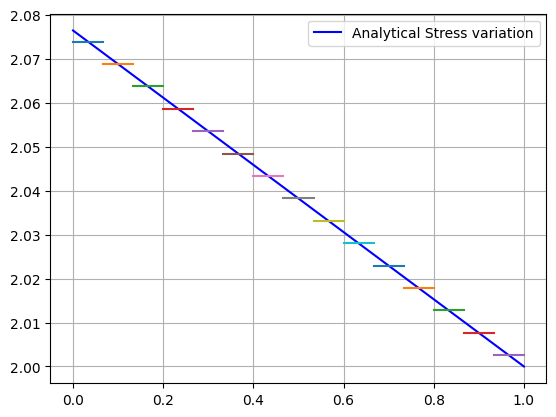

In [ ]:
pt.plot(xi,st_an*1e-6,label='Analytical Stress variation',c='b')
for i in range(len(Stress1)):
  x_val1 = np.arange(nodal_data[i,1], nodal_data[i+1,1]+0.0001,nodal_data[i+1,1]-nodal_data[i,1])
  pt.plot(x_val1, np.array([Stress1[i][0],Stress1[i][0]]))# ,label="Stress in Element by FEM")
pt.legend()
pt.grid('on')
pt.show()

In [ ]:
U_an=(1e-5)*xi+1.911e-7*xi**2

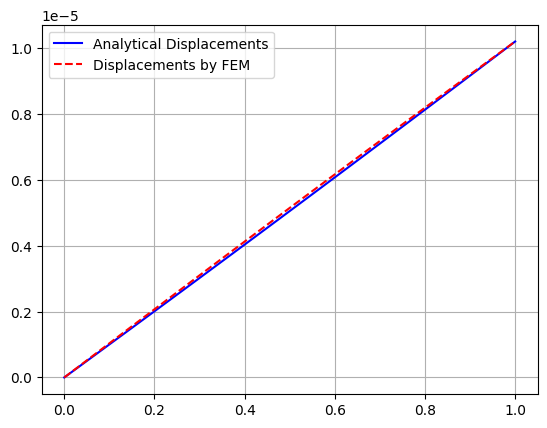

In [ ]:
pt.plot(xi,U_an,label='Analytical Displacements',c='b')
pt.plot(nodal_data[:,1],U1, label='Displacements by FEM',c='r',linestyle='--')
pt.legend()
pt.grid('on')
pt.show()

## Data for Problem 1(b): Cantilever Beam subjected to end load/Moment





In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 1, 2

# Create nodal data array
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

# Define Geometry parameters E,A
E, I = 2e11, 5e-6

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration

# Fixed degrees of freedom for bar
fdof = np.array([[0, 1, 1, 0, 0]]) # Bar fixed at left end

# Load vector for bar

F, M = 1e3, 1e4
lpf = np.array([[1, nel, 1000, 0]])
          #type, node_num,load
lpm = np.array([[1, nel, 0, 10000]])
          #

In [ ]:
l1=np.vstack([lpf,lpm])
l1[i]

array([    1,     2,     0, 10000])

In [ ]:
U1, St = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, l1, shape_beamln, _)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U1

array([[0.        ],
       [0.        ],
       [0.00135417],
       [0.005375  ],
       [0.00533333],
       [0.0105    ]])

In [ ]:
St*2e5  # St are strains in elements

array([ 541.66666667, 1591.66666667])

## Data for Problem 2 and Solution

In [ ]:
# Choosing linear bar element (each element has 2 nodes)
ndof, nnodcon = 1, 2

# Since we want to compare linear and quadratic elements, choose number of
# elements for linear to be twice that of quadratic.
L, kk = 1, 3
nel = 2*kk

nodal_data = np.zeros([nel+1,2])
nodal_data[:,0] = np.linspace(0,nel,nel+1)
nodal_data[:,1] = np.linspace(0,L,nel+1)

# Define E, A
E, A0 = 2e11, 5e-4;

# Define A at nodes
c = 0.5
A = A0/L*(1-nodal_data[:,1]) + c*A0/L*nodal_data[:,1];   # Function to calculate area at nodes

eleconnect = np.zeros([nel,3*nnodcon+2])
for i in range(nel):
    eleconnect[i,0:3] = np.array([i, i, i+1]) # Element Number, Left Node, Right Node
    eleconnect[i,3] = E*A[i]; # EA at left node
    eleconnect[i,4] = E*A[i+1]; # EA at right node
    eleconnect[i,7] = 2; # Gauss point

fdof = np.array([[0, 1, 0]]) # Bar fixed at left end

F = 1e3;
lpf = np.array([[1, nel, 1000]]) # Point load applied at x=L
#U2l, St2l = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf)


#U2q, St2q = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf)

In [ ]:
eleconnect

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+08,
        9.16666667e+07, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 9.16666667e+07,
        8.33333333e+07, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 3.00000000e+00, 8.33333333e+07,
        7.50000000e+07, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 3.00000000e+00, 4.00000000e+00, 7.50000000e+07,
        6.66666667e+07, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 4.00000000e+00, 5.00000000e+00, 6.66666667e+07,
        5.83333333e+07, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 5.00000000e+00, 6.00000000e+00, 5.83333333e+07,
        5.00000000e+07, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00]])

In [ ]:
U21, St21 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf,shape_barln,load_barl)

In [ ]:
St21

array([[1.04347826e-05],
       [1.14285714e-05],
       [1.26315789e-05],
       [1.41176471e-05],
       [1.60000000e-05],
       [1.84615385e-05]])

In [ ]:
U21

array([[0.00000000e+00],
       [1.73913043e-06],
       [3.64389234e-06],
       [5.74915550e-06],
       [8.10209667e-06],
       [1.07687633e-05],
       [1.38456864e-05]])

In [ ]:
# Quadratic INterpolation
nnodcon = 3; nel = 3;
# nodal_data is the same as defined before.

eleconnect = np.zeros([nel,1+nnodcon*3+1]);
for i in range(nel):
    eleconnect[i,0] = i;     # Element Number
    eleconnect[i,1] = 2*i;   # Left node for element
    eleconnect[i,2] = 2*i+1; # Center node for element
    eleconnect[i,3] = 2*i+2; # Right node for element
    #eleconnect[i,4:7] = E*A[[2*i,2*i+1,2*i+2]].mean() # EA at the three nodes
    # uncomment lines 149-151 for correct EA distribution.
    eleconnect[i,4] = E*A[2*i]   # EA at left node
    eleconnect[i,5] = E*A[2*i+1] # EA at middle node
    eleconnect[i,6] = E*A[2*i+2] # EA at right node
    eleconnect[i,10] = 3; # Gauss point

fdof = np.array([[0, 1, 0]])
lpf = np.array([[1, 6, 1000]])

In [ ]:
blockPrint()
U22, St22 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf,shape_barqn,load_barl)

In [ ]:
U22

array([[0.00000000e+00],
       [1.81818182e-06],
       [3.63636364e-06],
       [5.85858586e-06],
       [8.08080808e-06],
       [1.09379509e-05],
       [1.37950938e-05]])

In [ ]:
xi=np.linspace(0,L,11)
U_ana=(-2*F*L/(E*A0))*(np.log(2*L-xi)-np.log(2*L))

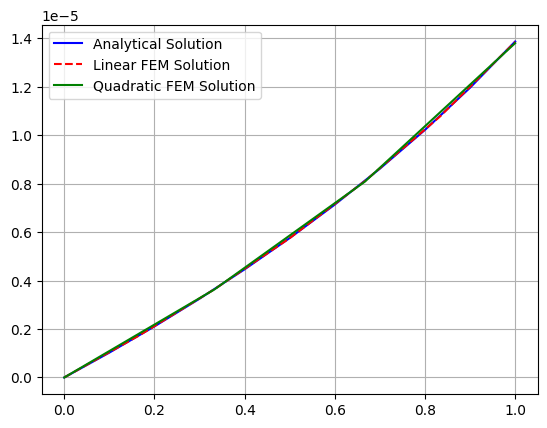

In [ ]:
pt.plot(xi,U_ana,c='b', label='Analytical Solution')

pt.plot(nodal_data[:, 1], U21, 'r--', label='Linear FEM Solution')

pt.plot(nodal_data[:, 1],U22, 'g-', label='Quadratic FEM Solution')
pt.legend()
pt.grid('on')
pt.show()

# Problem 3 Solution

In [ ]:
# Funtion to calculate area
def calculate_area(x):
    if 0 <= x <= 2.5:
        return 650 * (1.5 - 0.2 * x)**2
    elif 2.5 < x <= 5.5:
        return 650
    else:
        return 0


In [ ]:
# 2 - element descretization
ndof, nnodcon = 1, 2

L, kk = 5.5, 1
nel = 2*kk

#nodal_data = np.zeros([nel+1,2])
#nodal_data[:,0] = np.linspace(0,nel,nel+1)
#nodal_data[:,1] = np.linspace(0,L,nel+1)
nodal_data1=np.array([[0,0],[1,2.5],[2,5.5]])
xi=nodal_data1[:,1]
# Define E, A
E = np.array([200e3,70e3])  # in Mpa
A= np.zeros(len(xi))
for i in range(len(xi)):
  A[i]=calculate_area(xi[i]) # Pass to a function to calculate area at all nodes

eleconnect = np.zeros([nel,3*nnodcon+2])
for i in range(nel):
    eleconnect[i,0:3] = np.array([i, i, i+1]) # Element Number, Left Node, Right Node
    eleconnect[i,3] = E[i]*A[i]; # EA at left node
    eleconnect[i,4] = E[i]*A[i+1]; # EA at right node
    eleconnect[i,7] = 2; # Gauss point

fdof = np.array([[0, 1, 0]]) # Bar fixed at left end

F = 1e3;
lpf = np.array([[1, 1, 1000,0],[1,2,2000,0]]) # Point load applied at x=L

In [ ]:
nodal_data1[:,1]

array([0. , 2.5, 5.5])

In [ ]:
blockPrint()
U31, St31 = Fem_1D(ndof, nodal_data1, nnodcon, eleconnect, fdof, lpf,shape_barln,load_barl)

In [ ]:
U31

array([[0.00000000e+00],
       [3.55029586e-05],
       [1.67371090e-04]])

In [ ]:
# Increasing number of elements to 4
ndof, nnodcon = 1, 2

L, kk = 5.5, 2
nel = 2*kk

#nodal_data = np.zeros([nel+1,2])
#nodal_data[:,0] = np.linspace(0,nel,nel+1)
#nodal_data[:,1] = np.linspace(0,L,nel+1)
nodal_data2=np.array([[0,0],[1,1.25],[2,2.5],[3,4],[4,5.5]])
xi=nodal_data2[:,1]
# Define E, A
E = np.array([200e3,200e3,70e3,70e3])  # in Mpa
A= np.zeros(len(xi))
for i in range(len(xi)):
  A[i]=calculate_area(xi[i])

eleconnect = np.zeros([nel,3*nnodcon+2])
for i in range(nel):
    eleconnect[i,0:3] = np.array([i, i, i+1]) # Element Number, Left Node, Right Node
    eleconnect[i,3] = E[i]*A[i]; # EA at left node
    eleconnect[i,4] = E[i]*A[i+1]; # EA at right node
    eleconnect[i,7] = 2; # Gauss point

fdof = np.array([[0, 1, 0]]) # Bar fixed at left end

F = 1e3;
lpf = np.array([[1, 2, 1000,0],[1,4,2000,0]]) # Point load applied at x=L


In [ ]:
eleconnect

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 2.92500e+08, 2.03125e+08,
        0.00000e+00, 0.00000e+00, 2.00000e+00],
       [1.00000e+00, 1.00000e+00, 2.00000e+00, 2.03125e+08, 1.30000e+08,
        0.00000e+00, 0.00000e+00, 2.00000e+00],
       [2.00000e+00, 2.00000e+00, 3.00000e+00, 4.55000e+07, 4.55000e+07,
        0.00000e+00, 0.00000e+00, 2.00000e+00],
       [3.00000e+00, 3.00000e+00, 4.00000e+00, 4.55000e+07, 4.55000e+07,
        0.00000e+00, 0.00000e+00, 2.00000e+00]])

In [ ]:
blockPrint()
U32, St32 = Fem_1D(ndof, nodal_data2, nnodcon, eleconnect, fdof, lpf,shape_barln,load_barl)

In [ ]:
U32

array([[0.00000000e+00],
       [1.51324086e-05],
       [3.76464799e-05],
       [1.03580546e-04],
       [1.69514612e-04]])

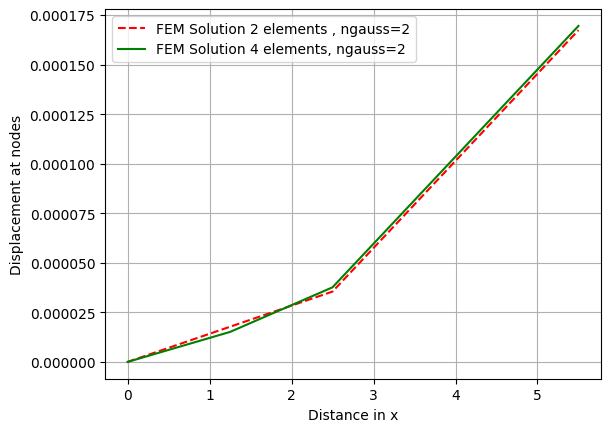

In [ ]:
pt.plot(nodal_data1[:, 1], U31, 'r--', label='FEM Solution 2 elements , ngauss=2')

pt.plot(nodal_data2[:, 1],U32, 'g-', label='FEM Solution 4 elements, ngauss=2')
pt.xlabel('Distance in x')
pt.ylabel('Displacement at nodes')
pt.legend()
pt.grid('on')
pt.show()

In [ ]:
# Increasing number of elements to 4
ndof, nnodcon = 1, 2

L, kk = 5.5, 2
nel = 2*kk

#nodal_data = np.zeros([nel+1,2])
#nodal_data[:,0] = np.linspace(0,nel,nel+1)
#nodal_data[:,1] = np.linspace(0,L,nel+1)
nodal_data3=np.array([[0,0],[1,1.25],[2,2.5],[3,4],[4,5.5]])
xi=nodal_data3[:,1]
# Define E, A
E = np.array([200e3,200e3,70e3,70e3])  # in Mpa
A= np.zeros(len(xi))
for i in range(len(xi)):
  A[i]=calculate_area(xi[i])

eleconnect = np.zeros([nel,3*nnodcon+2])
for i in range(nel):
    eleconnect[i,0:3] = np.array([i, i, i+1]) # Element Number, Left Node, Right Node
    eleconnect[i,3] = E[i]*A[i]; # EA at left node
    eleconnect[i,4] = E[i]*A[i+1]; # EA at right node
    eleconnect[i,7] = 2; # Gauss point

fdof = np.array([[0, 1, 0]]) # Bar fixed at left end
                 #node, is_Y_fix, Y_val
F = 1e3;
lpf = np.array([[1, 2, 1000,0],[1,4,2000,0]]) # Point load applied at x=L


In [ ]:
blockPrint()
U33, St33 = Fem_1D(ndof, nodal_data2, nnodcon, eleconnect, fdof, lpf,shape_barln,load_barl)

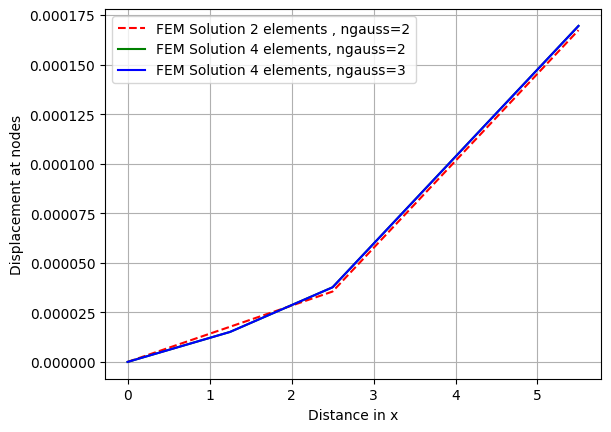

In [ ]:
pt.plot(nodal_data1[:, 1], U31, 'r--', label='FEM Solution 2 elements , ngauss=2')

pt.plot(nodal_data2[:, 1],U32, 'g-', label='FEM Solution 4 elements, ngauss=2')
pt.plot(nodal_data3[:, 1],U33, 'b-', label='FEM Solution 4 elements, ngauss=3')
pt.xlabel('Distance in x')
pt.ylabel('Displacement at nodes')
pt.legend()
pt.grid('on')
pt.show()

##### Solution for ngauss =2 (green) and ngauss=2 (blue) coincides each other

## Data for Problem 4 : Heat conduction in a bar with temperature at one end and insulated tip

In [ ]:
def shape_heatq(l,kA,ph):
  K1= (ph*l/30)*np.array([[4,2,-1],[2,16,2],[-1,2,4]])
  K2=(kA/(3*l))*np.array([[7,-8,1],[-8,16,-8],[1,-8,7]])
  stiff =K1+K2
  return stiff

In [ ]:
ndof, nnodcon = 1, 2
L, kk = 0.05, 2
nel = 2*kk
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

h, k, A, P = 20, 200, np.pi*1e-6/4, np.pi*1e-3
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i
    eleconnect[i, 1] = i
    eleconnect[i, 2] = i + 1
    eleconnect[i, 3:5] = k*A
    eleconnect[i, 5:7] = h*P
    eleconnect[i, 7] = 0

To, Tinf = 300, 30
fdof = np.array([[0, 1, To-Tinf]])
                 # node, is_T_def(1),value_of_T
lpf = np.array([[1,4,0]])
            #type, node num , value(heat_flux=0)=> heat_flux is point load
            # for type 2 , Node num , value(heat_generation)=> heat source term is similar to distributed load
#U1, St1 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_heatl, load_barln)

In [ ]:
blockPrint()
Thl1, Sth1 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_heatl, load_barl)

In [ ]:
Thl1

array([[270.        ],
       [226.36729603],
       [197.03147391],
       [180.13974488],
       [174.62526289]])

In [ ]:
# FOR QUADRATIC
nnodcon = 3; nel = kk;
# nodal_data is the same as defined before.

eleconnect = np.zeros([nel,1+nnodcon*3+1]);
for i in range(nel):
    eleconnect[i,0] = i;
    eleconnect[i,1] = 2*i;
    eleconnect[i,2] = 2*i+1;
    eleconnect[i,3] = 2*i+2;
    eleconnect[i,4:7] = k*A
    eleconnect[i,7:10] = h*P;
    eleconnect[i,10] = 3;

#U2, St2 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_barqn, shape_barqn)

In [ ]:
eleconnect

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        1.57079633e-04, 1.57079633e-04, 1.57079633e-04, 6.28318531e-02,
        6.28318531e-02, 6.28318531e-02, 3.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00,
        1.57079633e-04, 1.57079633e-04, 1.57079633e-04, 6.28318531e-02,
        6.28318531e-02, 6.28318531e-02, 3.00000000e+00]])

In [ ]:
Thq1, Stq = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_barqn, _)

In [ ]:
Thq1

array([[270.        ],
       [226.53164623],
       [197.31056581],
       [180.47037077],
       [174.98051351]])

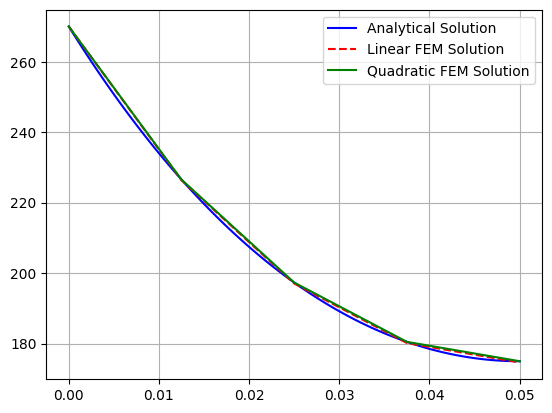

In [ ]:
m = np.sqrt(h*P/k/A);
xi = np.linspace(0,L,100); T_ex = Tinf + (To-Tinf)*np.cosh(m*(L-xi))/np.cosh(m*L)
pt.plot(xi,T_ex-30,c='b', label='Analytical Solution')

pt.plot(nodal_data[:, 1], Thl1, 'r--', label='Linear FEM Solution')

pt.plot(nodal_data[:, 1], Thq1, 'g-', label='Quadratic FEM Solution')
pt.legend()
pt.grid('on')
pt.show()

## Problem 5: Load vector for Robin BC and

In [ ]:
# Using Two linear Elements
ndof, nnodcon = 1, 2
L, kk = 0.05, 1
nel = 2*kk
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

h, k, A, P = 100, 50,np.pi*1e-4, np.pi*2e-2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i
    eleconnect[i, 1] = i
    eleconnect[i, 2] = i + 1
    eleconnect[i, 3:5] = k*A
    eleconnect[i, 5:7] = h*P
    eleconnect[i, 7] = 0

To, Tinf = 320, 20
fdof = np.array([[0, 1, To-Tinf]]) # temp is defined at left end
lpf = np.array([[3, nel, h*P]])
                # BC type,node_num, value



In [ ]:
Th51,S51=Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_heatl, _)

In [ ]:
Th51

array([[300.        ],
       [137.9688792 ],
       [ 11.92963993]])

In [ ]:
# USing one Quadratic element
nnodcon = 3; nel = 1;
# nodal_data is the same as defined before.
nodal_data = np.zeros([2+1, 2])
for i in range(2+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/2

eleconnect = np.zeros([nel,1+nnodcon*3+1]);
for i in range(nel):
    eleconnect[i,0] = i;
    eleconnect[i,1] = 2*i;
    eleconnect[i,2] = 2*i+1;
    eleconnect[i,3] = 2*i+2;
    eleconnect[i,4:7] = k*A
    eleconnect[i,7:10] = h*P;
    eleconnect[i,10] = 3;

To, Tinf = 320, 20
fdof = np.array([[0, 1, To-Tinf]])
lpf = np.array([[3, 2, h*P, -2]])

In [ ]:
Th52,S52=Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_barqn, _)

In [ ]:
Th52

array([[300.        ],
       [138.27083704],
       [ 11.99573485]])

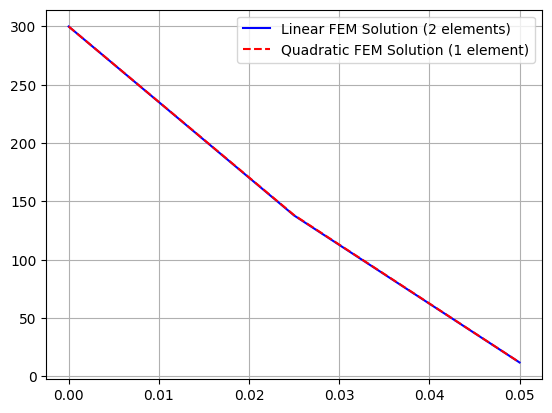

In [ ]:
pt.plot(nodal_data[:, 1],Th51,c='b', label='Linear FEM Solution (2 elements)')

pt.plot(nodal_data[:, 1], Th52, 'r--', label='Quadratic FEM Solution (1 element)')

pt.legend()
pt.grid('on')
pt.show()

# Problem 6 : Solution

In [ ]:
ndof, nnodcon = 1, 2
L= 0.11
nel = 3
nodal_data = np.array([[0,0],[1,0.05],[2,0.085],[3,0.11]])
k=np.array([50,30,70])
h1=10
h2=15
A=1
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i
    eleconnect[i, 1] = i
    eleconnect[i, 2] = i + 1
    eleconnect[i, 3:5] = k[i]*A
    eleconnect[i, 5:7] = 0
    eleconnect[i, 7] = 0

To, Tl = 100,35
# Assume right node temp to be ambient so Theta at right node =0
fdof = np.array([[0, 1, h1*100],[0,3,h2*35]])
                 #node,Heat flux given or not, value
lpf = np.array([[3, 0, h1, 1],[3,3,h2,1]])
            #type, node num , value
#U1, St1 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_heatl, load_barln)

In [ ]:
eleconnect

array([[ 0.,  0.,  1., 50., 50.,  0.,  0.,  0.],
       [ 1.,  1.,  2., 30., 30.,  0.,  0.,  0.],
       [ 2.,  2.,  3., 70., 70.,  0.,  0.,  0.]])

In [ ]:
Th61, St61 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fdof, lpf, shape_heatl, _)

In [ ]:
Th61

array([[1000.        ],
       [ 985.54714384],
       [ 968.68547832],
       [ 963.52374398]])

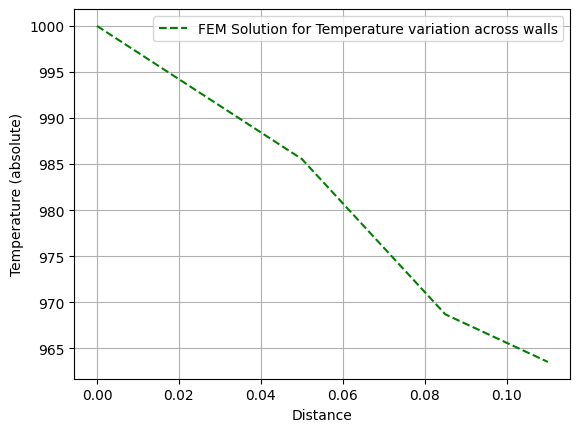

In [ ]:
pt.plot(nodal_data[:, 1], Th61, 'g--', label='FEM Solution for Temperature variation across walls')
pt.xlabel('Distance')
pt.ylabel('Temperature (absolute)')
pt.legend()
pt.grid('on')
pt.show()

# Problem 7 ; Solution

In [ ]:
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 1, 2

# Create nodal data array
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

# Define Geometry parameters E,A
E, I = 1, 1

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration

# Fixed degrees of freedom for bar
fixeddofs = np.array([[0  ,  1,  0,  0 , 0],[2,1,0,0,0]]) # SSB
                      #node, Y(defined=1), theta(not defined=0), Y(defined_val is=0), theta(val_don't know=0), 0,0
z = symbols('z')
l1 =np.array([[ 2,0,sin(pi*(z+nodal_data[0,1])),2],[2,1,sin(pi*(z+nodal_data[1,1])),2]])
           #type,element,  function for Dist. load at element,   ngauss


In [ ]:
blockPrint()
U7, St7 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U7

array([[ 0.00000000e+00],
       [ 3.20740917e-02],
       [ 1.02948306e-02],
       [-5.42101086e-19],
       [ 0.00000000e+00],
       [-3.20740917e-02]])

In [ ]:
z=symbols('z')
l=1
Y_el=[]
M_el=[]
S_el=[]
N=np.array([1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2])
for i in range(nel):
  Y1 =np.dot(N,U7[(2*i):(2*i+4),0])
  M1= E*I*(diff(Y1,z,2))
  S1 = -E*I*(diff(Y1,z,3))
  Y_el.append(Y1)
  M_el.append(M1)
  S_el.append(S1)

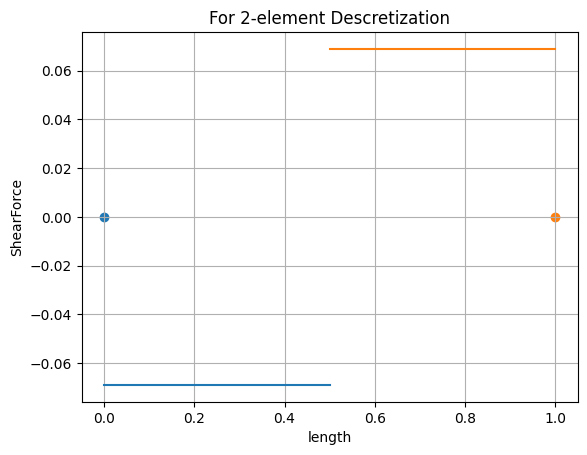

In [ ]:
x_val1 = np.arange(0, 0.51,0.5)
pt.plot(x_val1, np.array([S_el[0],S_el[0]]))
pt.plot(x_val1+0.5,np.array([S_el[1],S_el[1]]))
pt.scatter(0,0)
pt.scatter(1,0)
pt.plot()
pt.title('For 2-element Descretization')
pt.xlabel('length')
pt.ylabel('ShearForce')
pt.grid(True)
pt.show()

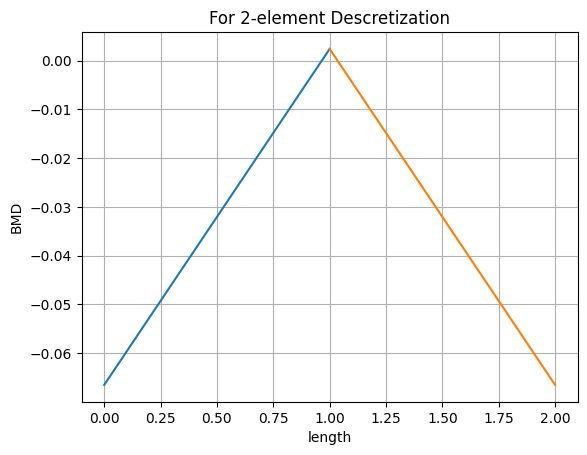

In [ ]:
x_val1 = np.arange(0, 1.1,0.1)
y_val1 = [M_el[0].subs(z, val) for val in x_val1]
y_val2 = [M_el[1].subs(z, val) for val in x_val1]
pt.plot(x_val1, y_val1)
pt.plot(x_val1+1,y_val2)
pt.plot()
pt.title('For 2-element Descretization')
pt.xlabel('length')
pt.ylabel('BMD')
pt.grid(True)
pt.show()

In [ ]:
ndof, nnodcon = 2, 2

# Unit length bar discretized with 4 elements
L, nel = 1, 10

# Create nodal data array
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

# Define Geometry parameters E,A
E, I = 1, 1

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration

# Fixed degrees of freedom for bar
fixeddofs = np.array([[0  ,  1,  0,  0 , 0],[nel,1,0,0,0]]) # SSB
                      #node, Y(defined=1), theta(not defined=0), Y(defined_val is=0), theta(val_don't know=0), 0,0
z = symbols('z')
l1 =[]
for i in range(nel):
  l1.append([2,i,sin(pi*(z+nodal_data[i,1])),2])
l1=np.array(l1)
#l1 =np.array([[ 2,0,sin(pi*(z+nodal_data[0,1])),2],[2,1,sin(pi*(z+nodal_data[1,1])),2],[2,2,sin(pi*(z+nodal_data[2,1])),2],[2,3,sin(pi*(z+nodal_data[3,1])),2]])
           #type,element,  function,   ngauss


In [ ]:
nodal_data

array([[ 0. ,  0. ],
       [ 1. ,  0.1],
       [ 2. ,  0.2],
       [ 3. ,  0.3],
       [ 4. ,  0.4],
       [ 5. ,  0.5],
       [ 6. ,  0.6],
       [ 7. ,  0.7],
       [ 8. ,  0.8],
       [ 9. ,  0.9],
       [10. ,  1. ]])

In [ ]:
blockPrint()
U72, St72 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U72

array([[ 0.00000000e+00],
       [ 3.22513140e-02],
       [ 3.17237036e-03],
       [ 3.06728223e-02],
       [ 6.03420701e-03],
       [ 2.60918611e-02],
       [ 8.30537343e-03],
       [ 1.89568467e-02],
       [ 9.76355203e-03],
       [ 9.96620411e-03],
       [ 1.02660061e-02],
       [-4.93432455e-16],
       [ 9.76355203e-03],
       [-9.96620411e-03],
       [ 8.30537343e-03],
       [-1.89568467e-02],
       [ 6.03420701e-03],
       [-2.60918611e-02],
       [ 3.17237036e-03],
       [-3.06728223e-02],
       [ 0.00000000e+00],
       [-3.22513140e-02]])

In [ ]:
z=symbols('z')
l=L/nel
Y_el1=[]
M_el1=[]
S_el1=[]
N=np.array([1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2])
for i in range(nel):
  Y1 =np.dot(N,U72[(2*i):(2*i+4),0])
  M1= E*I*(diff(Y1,z,2))
  S1 = -E*I*(diff(Y1,z,3))
  Y_el1.append(Y1)
  M_el1.append(M1)
  S_el1.append(S1)

In [ ]:
M_el1

[-(0.313962545086453*z + 8.67893460874125e-5),
 -(0.283229703667718*z + 0.031648127000994),
 -(0.224772365476578*z + 0.0601115254795788),
 -(0.144312742071443*z + 0.0826907890226053),
 -(0.0497267819863628*z + 0.0971757019954839),
 0.0497267819863672*z - 0.102148380194124,
 0.144312742071457*z - 0.0971220632297434,
 0.224772365476599*z - 0.0825887620272322,
 0.283229703667702*z - 0.0599710973677509,
 0.313962545086443*z - 0.0314830438547202]

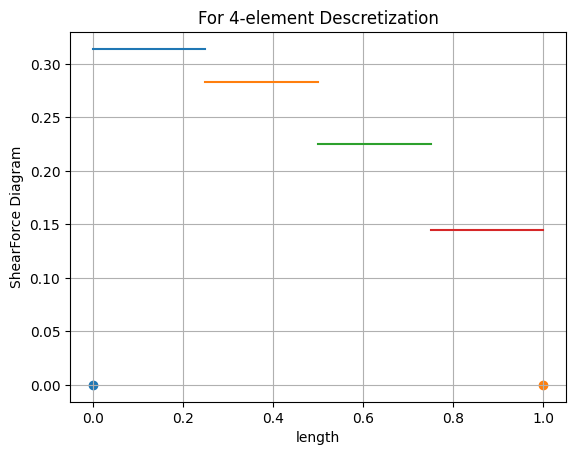

In [ ]:
x_val1 = np.arange(0, 0.251,0.25)
pt.plot(x_val1, np.array([S_el1[0],S_el1[0]]))
pt.plot(x_val1+0.25,np.array([S_el1[1],S_el1[1]]))
pt.plot(x_val1+0.5,np.array([S_el1[2],S_el1[2]]))
pt.plot(x_val1+0.75,np.array([S_el1[3],S_el1[3]]))
pt.scatter(0,0)
pt.scatter(1,0)
pt.plot()
pt.title('For 4-element Descretization')
pt.xlabel('length')
pt.ylabel('ShearForce Diagram')
pt.grid(True)
pt.show()

In [ ]:
U7y=np.zeros(nel+1)
U7s = np.zeros(nel+1)
for i in range(len(U7y)):
  U7y[i]=U72[2*i]
for i in range(len(U7s)):
  U7s[i]=U72[2*i+1]

<ipython-input-86-fa2ff3a47938>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7y[i]=U72[2*i]
<ipython-input-86-fa2ff3a47938>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7s[i]=U72[2*i+1]


In [ ]:
U7y

array([0.        , 0.00317237, 0.00603421, 0.00830537, 0.00976355,
       0.01026601, 0.00976355, 0.00830537, 0.00603421, 0.00317237,
       0.        ])

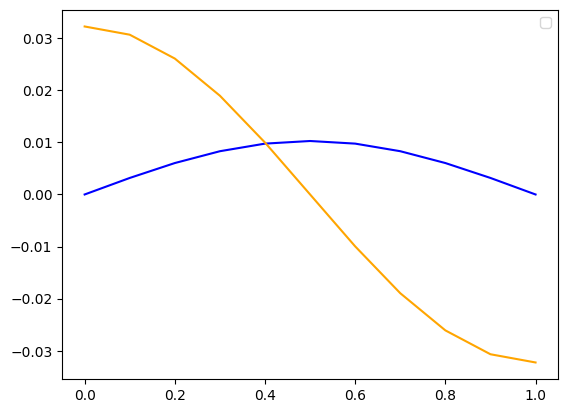

In [ ]:
pt.plot(nodal_data[:,1],U7y,c='b')
pt.plot(nodal_data[:,1],U7s,c='orange')
pt.legend()

In [ ]:
y2=[]
for i in range(len(U7s)-1):
  e = (U7s[i+1]-U7s[i])/(nodal_data[i+1,1]-nodal_data[i,1])  # TO get strains St
  y2.append(e)
y2=np.array(y2)

In [ ]:
y2*2e5

array([ -3156.98332008,  -9161.92243688, -14270.02875068, -17981.28522524,
       -19932.40821896, -19932.40821896, -17981.28522523, -14270.02875068,
        -9161.92243687,  -3156.98332008])

In [ ]:
M=y2*E*I

In [ ]:
y2

array([-0.01578492, -0.04580961, -0.07135014, -0.08990643, -0.09966204,
       -0.09966204, -0.08990643, -0.07135014, -0.04580961, -0.01578492])

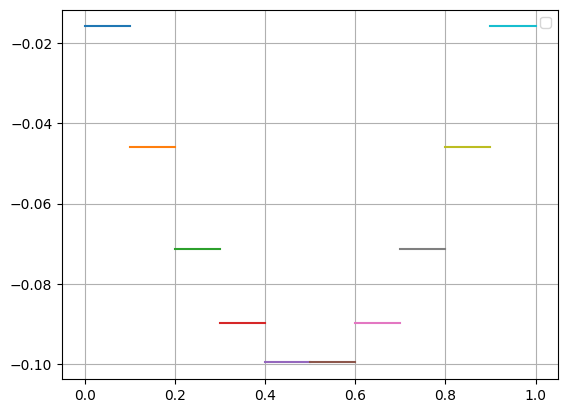

In [ ]:
for i in range(len(M)):
  x_val1 = np.arange(nodal_data[i,1], nodal_data[i+1,1]+0.001,nodal_data[i+1,1]-nodal_data[i,1])
  pt.plot(x_val1, np.array([M[i],M[i]]))# ,label="Stress in Element by FEM")
pt.legend()
pt.grid('on')
pt.show()

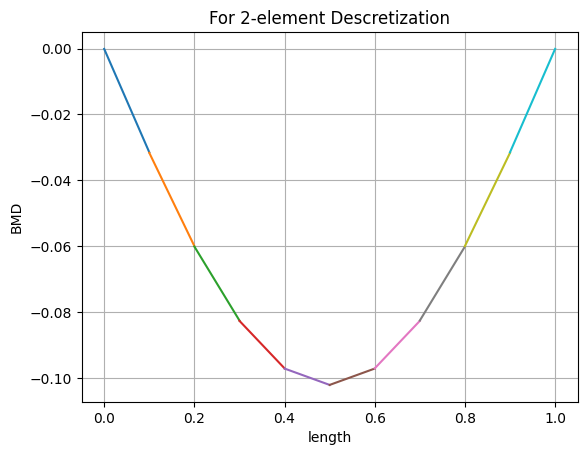

In [ ]:
x_val1 = np.arange(0, L/nel+0.001,0.01)
for i in range(nel):
  y_val1 = [M_el1[i].subs(z, val) for val in x_val1]
  pt.plot(x_val1+(L/nel)*i, y_val1)
  #y_val2 = [M_el1[1].subs(z, val) for val in x_val1]
  #y_val3 = [M_el1[2].subs(z, val) for val in x_val1]
  #y_val4 = [M_el1[3].subs(z, val) for val in x_val1]
#pt.plot(x_val1, y_val1)
#pt.plot(x_val1+0.5,y_val3)
#pt.plot(x_val1+0.75,y_val4)
#pt.plot()
pt.title('For 2-element Descretization')
pt.xlabel('length')
pt.ylabel('BMD')
pt.grid(True)
pt.show()

#Problem 8 Solution -

In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 5, 5

# Create nodal data array
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

# Define Geometry parameters E,A
E, I = 2e11, 5e-9

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration

# Fixed degrees of freedom for bar
fixeddofs = np.array([[0 , 1, 0,  0 , 0],[1,0,0,0,0],[2,1,0,0,0],[3,1,0,0,0],[4,0,0,0,0],[5,1,0,0,0]])
l1 =np.array([[1,1,1000,0],[2,3,12000,2],[2,4,12000,2]])

In [ ]:
blockPrint()
U8, St8 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U8

array([[ 0.        ],
       [ 0.39285714],
       [ 0.27380952],
       [ 0.03571429],
       [ 0.        ],
       [-0.53571429],
       [ 0.        ],
       [ 1.28571429],
       [ 1.48214286],
       [ 0.33928571],
       [ 0.        ],
       [-2.64285714]])

In [ ]:
z=symbols('z')
l=1
Y_el=[]
M_el=[]
S_el=[]
N=np.array([1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2])
for i in range(nel):
  Y1 =np.dot(N,U8[(2*i):(2*i+4),0])
  M1=E*I*(diff(Y1,z,2))
  S1 = -E*I*(diff(Y1,z,3))
  Y_el.append(Y1)
  M_el.append(M1)
  S_el.append(S1)

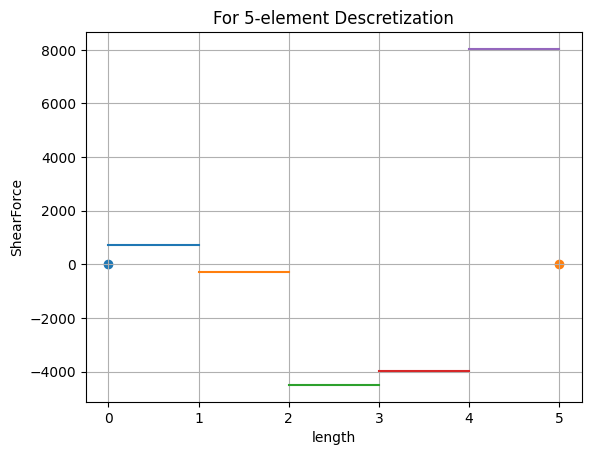

In [ ]:
x_val1 = np.arange(0, 1.1,1)
pt.plot(x_val1, np.array([S_el[0],S_el[0]]))
pt.plot(x_val1+1,np.array([S_el[1],S_el[1]]))
pt.plot(x_val1+2,np.array([S_el[2],S_el[2]]))
pt.plot(x_val1+3,np.array([S_el[4],S_el[4]]))
pt.plot(x_val1+4,np.array([S_el[3],S_el[3]]))
pt.scatter(0,0)
pt.scatter(5,0)
pt.title('For 5-element Descretization')
pt.xlabel('length')
pt.ylabel('ShearForce')
pt.grid(True)
pt.show()

In [ ]:
np.array(S_el).sum() # Shear Force Sums upto Zero

3.63797880709171e-12

In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 5, 10

# Create nodal data array
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

# Define Geometry parameters E,A
E, I = 2e11, 5e-9

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration

# Fixed degrees of freedom for bar
fixeddofs = np.array([[0 , 1, 0,  0 , 0],[1,0,0,0,0],[4,1,0,0,0],[6,1,0,0,0],[8,0,0,0,0],[10,1,0,0,0]])
l1 =np.array([[1,1,1000,0],[2,6,12000,2],[2,7,12000,2],[2,8,12000,2],[2,9,12000,2]])

In [ ]:
blockPrint()
U82, St82 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U82

array([[ 0.        ],
       [ 0.39375   ],
       [ 0.17578125],
       [ 0.2671875 ],
       [ 0.24583333],
       [ 0.0125    ],
       [ 0.18776042],
       [-0.2453125 ],
       [ 0.        ],
       [-0.50625   ],
       [-0.22265625],
       [-0.1921875 ],
       [ 0.        ],
       [ 1.275     ],
       [ 0.88710937],
       [ 1.81328125],
       [ 1.478125  ],
       [ 0.340625  ],
       [ 1.14257812],
       [-1.64296875],
       [ 0.        ],
       [-2.6375    ]])

In [ ]:
z=symbols('z')
l=1
Y_el=[]
M_el=[]
S_el=[]
N=np.array([1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2])
for i in range(nel):
  Y1 =np.dot(N,U82[(2*i):(2*i+4),0])
  M1=E*I*(diff(Y1,z,2))
  S1 = -E*I*(diff(Y1,z,3))
  Y_el.append(Y1)
  M_el.append(M1)
  S_el.append(S1)

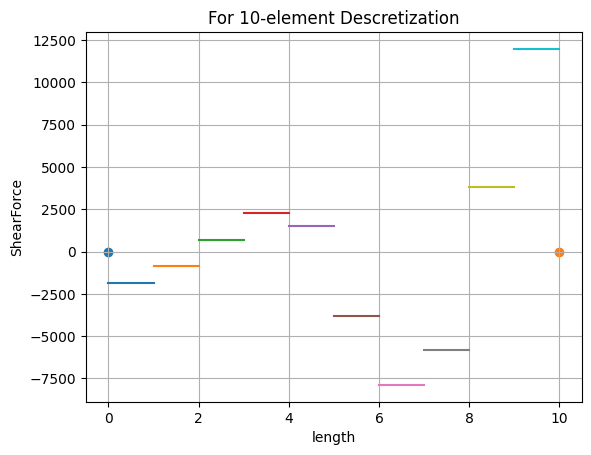

In [ ]:
x_val1 = np.arange(0, 1.1,1)
pt.plot(x_val1, np.array([S_el[0],S_el[0]]))
pt.plot(x_val1+1,np.array([S_el[1],S_el[1]]))
pt.plot(x_val1+2,np.array([S_el[2],S_el[2]]))
pt.plot(x_val1+3,np.array([S_el[3],S_el[3]]))
pt.plot(x_val1+4,np.array([S_el[4],S_el[4]]))
pt.plot(x_val1+5,np.array([S_el[5],S_el[5]]))
pt.plot(x_val1+6,np.array([S_el[6],S_el[6]]))
pt.plot(x_val1+7,np.array([S_el[7],S_el[7]]))
pt.plot(x_val1+8,np.array([S_el[8],S_el[8]]))
pt.plot(x_val1+9,np.array([S_el[9],S_el[9]]))
pt.scatter(0,0)
pt.scatter(10,0)
pt.plot()
pt.title('For 10-element Descretization')
pt.xlabel('length')
pt.ylabel('ShearForce')
pt.grid(True)
pt.show()

### For 10 elements We can observe some clarity for SFD, given by our solution

# Data for Problem 9 and Solution

In [ ]:
import matplotlib.pyplot as pt

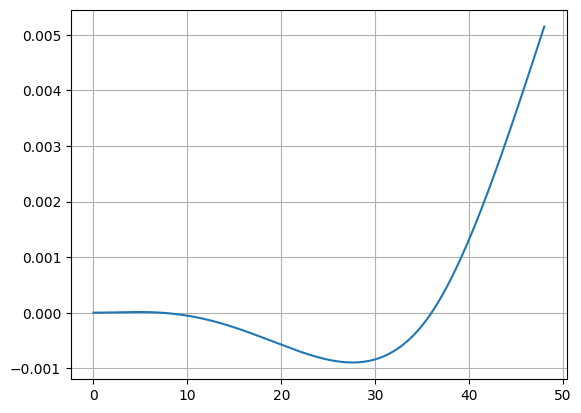

In [ ]:
E, I = 3e7, 4.5
a1, a2 = -201496/729, 43504/81;
b1, b2, b3, b4 = -143176/729, 8944/81, 5120/3, -16384/3;
c1, c2, c3, c4 = -500, 24000, -4554592/9, 6554368;

s1 = lambda x : 1/E/I*(a2*x**2/2+a1*x**3/6+5/4*x**4-x**5/192)
s2 = lambda x : 1/E/I*(b4+b3*x+b2*x**2/2+b1*x**3/6+5/6*x**4)
s3 = lambda x : 1/E/I*(c4+c3*x+c2*x**2/2+c1*x**3/6)
t = np.linspace(0,48,480)
y = np.select([(t<=16),(t>16)*(t<=36),(t>36)],[s1(t), s2(t), s3(t)])
pt.plot(t,y)
pt.grid('on')
pt.show()

In [ ]:
# For 3 element Descretization

In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 48, 3

# Create nodal data array
#nodal_data = np.zeros([nel+1, 2])
#for i in range(nel+1):
#   nodal_data[i, 0] = i
#   nodal_data[i, 1] = i*L/nel
nodal_data = np.zeros([nel+1, 2])
nodal_data[1,:]=np.array([1,16])
nodal_data[2,:]=np.array([2,16+20])
nodal_data[3,:]=np.array([3,16+20+12])

# Define Geometry parameters E,A
E, I = 30e6, 4.5

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration

# Fixed degrees of freedom for bar
fixeddofs = np.array([[0 , 1, 0,  0 , 0],[2,1,0,0,0]])
z=symbols('z')
l1 =np.array([[2,0,30*(1-z/48),2],[2,1,20,2],[1,3,500,0]])


In [ ]:
blockPrint()
U9, St9 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U9

array([[ 0.00000000e+00],
       [ 4.78658741e-05],
       [ 5.46258192e-06],
       [-6.09955799e-05],
       [ 0.00000000e+00],
       [ 2.27618961e-04],
       [ 4.86476086e-03],
       [ 4.94285627e-04]])

In [ ]:
z=symbols('z')
l=1
Y_el1=[]
M_el1=[]
S_el1=[]
N=np.array([1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2])
for i in range(3):
  Y1 =np.dot(N,U9[(2*i):(2*i+4),0])
  M1=E*I*(diff(Y1,z,2))
  S1 = -E*I*(diff(Y1,z,3))
  Y_el1.append(Y1)
  M_el1.append(M1)
  S_el1.append(S1)

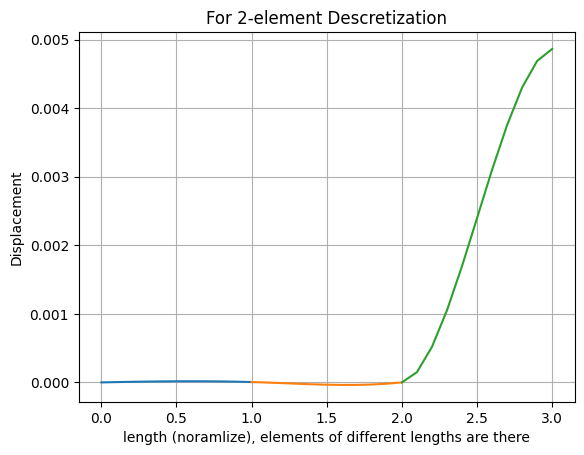

In [ ]:
x_val1 = np.arange(0, 1.1,0.1)
y_val1 = [Y_el1[0].subs(z, val) for val in x_val1]
x_val2 = np.arange(0, 1.1,0.1)
y_val2= [Y_el1[1].subs(z, val) for val in x_val2]
x_val3 = np.arange(0, 1.1,0.1)
y_val3= [Y_el1[2].subs(z, val) for val in x_val3]
pt.plot(x_val1, y_val1)
pt.plot(x_val2+1, y_val2)
pt.plot(x_val3+2, y_val3)
pt.plot()
pt.title('For 2-element Descretization')
pt.xlabel('length (noramlize), elements of different lengths are there')
pt.ylabel('Displacement')
pt.grid(True)
pt.show()

In [ ]:
# nodal data for 6 elements, 7 nodes
nel =6
nodal_data = np.zeros([nel+1, 2])
nodal_data[1,:]=np.array([1,8])
nodal_data[2,:]=np.array([2,8+8])
nodal_data[3,:]=np.array([3,16+10])
nodal_data[4,:]=np.array([4,16+10+10])
nodal_data[5,:]=np.array([5,16+20+6])
nodal_data[6,:]=np.array([6,16+20+6+6])

# Define Geometry parameters E,A
E, I = 30e6, 4.5

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration
z=symbols('z')
fixeddofs = np.array([[0 , 1, 0,  0 , 0],[4,1,0,0,0]])
l1 =np.array([[2,0,30*(1-z/48),2],[2,1,30*(1-(z+nodal_data[1,1])/48),2],[2,2,20,2],[2,3,20,2],[1,6,500,0]])

In [ ]:
nodal_data

array([[ 0.,  0.],
       [ 1.,  8.],
       [ 2., 16.],
       [ 3., 26.],
       [ 4., 36.],
       [ 5., 42.],
       [ 6., 48.]])

In [ ]:
blockPrint()
U92, St92 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)


<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
St92

array([ 3.16537113e-05, -3.06782503e-05, -6.63709800e-05,  6.55906112e-05,
        3.38613016e-04,  4.71946350e-04])

In [ ]:
U92

array([[ 0.00000000e+00],
       [ 4.77488188e-05],
       [ 2.53229691e-04],
       [ 3.94086267e-06],
       [ 7.80368846e-06],
       [-6.11126353e-05],
       [-6.55906112e-04],
       [-4.21825941e-05],
       [ 0.00000000e+00],
       [ 2.27501905e-04],
       [ 2.03167810e-03],
       [ 4.27501905e-04],
       [ 4.86335620e-03],
       [ 4.94168572e-04]])

In [ ]:
U9y=np.zeros(7)
U9s = np.zeros(7)
for i in range(len(U9y)):
  U9y[i]=U92[2*i]
for i in range(len(U9s)):
  U9s[i]=U92[2*i+1]

<ipython-input-119-c113bd39d6ce>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U9y[i]=U92[2*i]
<ipython-input-119-c113bd39d6ce>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U9s[i]=U92[2*i+1]


In [ ]:
U9y  # Displacements

array([ 0.00000000e+00,  2.53229691e-04,  7.80368846e-06, -6.55906112e-04,
        0.00000000e+00,  2.03167810e-03,  4.86335620e-03])

In [ ]:
U9s   # slopes

array([ 4.77488188e-05,  3.94086267e-06, -6.11126353e-05, -4.21825941e-05,
        2.27501905e-04,  4.27501905e-04,  4.94168572e-04])

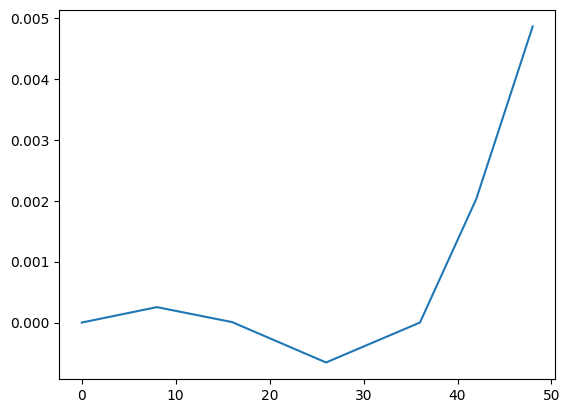

In [ ]:
pt.plot(nodal_data[:,1],U9y)

In [ ]:
y2=[]
for i in range(len(U9s)-1):
  e = (U9s[i+1]-U9s[i])/(nodal_data[i+1,1]-nodal_data[i,1])  # TO get strains St
  y2.append(e)
y2=np.array(y2)

In [ ]:
M=y2*E*I   # moment

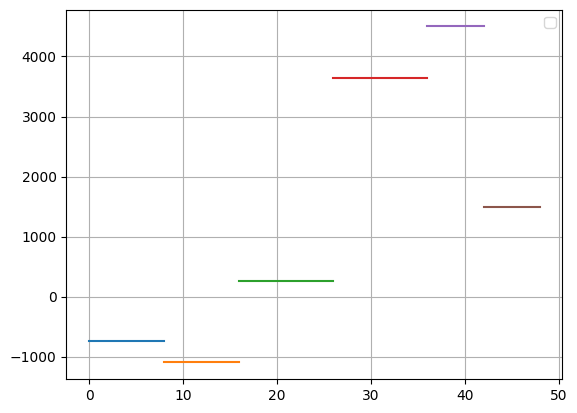

In [ ]:
for i in range(len(M)):
  x_val1 = np.arange(nodal_data[i,1], nodal_data[i+1,1]+0.01,nodal_data[i+1,1]-nodal_data[i,1])
  pt.plot(x_val1, np.array([M[i],M[i]]))# ,label="Stress in Element by FEM")
pt.legend()
pt.grid('on')
pt.show()

In [ ]:
z=symbols('z')
l=1
Y_el2=[]
M_el2=[]
S_el2=[]
N=np.array([1-3*z**2/l**2+2*z**3/l**3,z-2*z**2/l+z**3/l**2,3*z**2/l**2-2*z**3/l**3,-z**2/l+z**3/l**2])
for i in range(6):
  Y1 =np.dot(N,U92[(2*i):(2*i+4),0])
  M1=E*I*(diff(Y1,z,2))
  S1 = -E*I*(diff(Y1,z,3))
  Y_el2.append(Y1)
  M_el2.append(M1)
  S_el2.append(S1)

In [ ]:
Y_el2[5]

-0.00474168571864053*z**3 + 0.00714586191129412*z**2 + 0.000427501905197386*z + 0.00203167809785098

Text(0, 0.5, 'Displacement in Y direction')

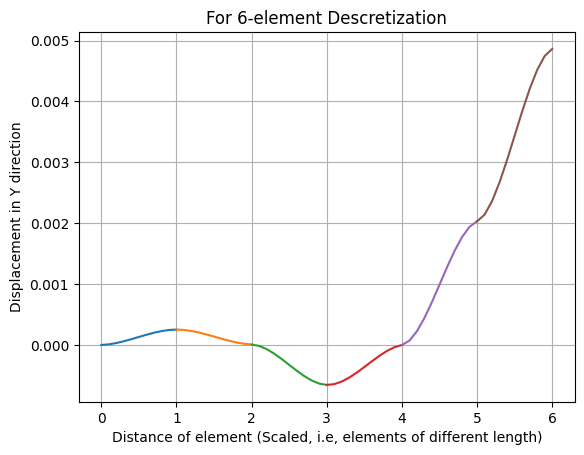

In [ ]:
x_val1 = np.arange(0, 1.1,0.1)
y_val1 = [Y_el2[0].subs(z, val) for val in x_val1]
x_val2 = np.arange(0, 1.1,0.1)
y_val2 = [Y_el2[1].subs(z, val) for val in x_val2]
x_val3 = np.arange(0, 1.1,0.1)
y_val3 = [Y_el2[2].subs(z, val) for val in x_val3]
x_val4 = np.arange(0, 1.1,0.1)
y_val4 = [Y_el2[3].subs(z, val) for val in x_val4]
x_val5 = np.arange(0, 1.1,0.1)
y_val5 = [Y_el2[4].subs(z, val) for val in x_val5]
x_val6 = np.arange(0, 1.1,0.1)
y_val6 = [Y_el2[5].subs(z, val) for val in x_val6]
pt.plot(x_val1, y_val1)
pt.plot(x_val2+1, y_val2)
pt.plot(x_val3+2, y_val3)
pt.plot(x_val4+3, y_val4)
pt.plot(x_val5+4, y_val5)
pt.plot(x_val6+5, y_val6)
pt.grid()
pt.title('For 6-element Descretization')
pt.xlabel('Distance of element (Scaled, i.e, elements of different length)')
pt.ylabel('Displacement in Y direction')

In [ ]:
# nodal data for 6 elements, 7 nodes
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 48, 12
nodal_data = np.zeros([nel+1, 2])
for i in range(nel+1):
    nodal_data[i, 0] = i
    nodal_data[i, 1] = i*L/nel

# Define Geometry parameters E,A
E, I = 30e6, 4.5

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration
z=symbols('z')
fixeddofs = np.array([[0 , 1, 0,  0 , 0],[9,1,0,0,0]])
l1 =np.array([[2,0,30*(1-z/48),2],[2,1,30*(1-(z+nodal_data[1,1])/48),2],[2,1,30*(1-(z+nodal_data[2,1])/48),2],[2,1,30*(1-(z+nodal_data[3,1])/48),2],[2,4,20,2],[2,5,20,2],[2,6,20,2],[2,7,20,2],[2,8,20,2],[1,12,500,0]])

In [ ]:
blockPrint()
U93, St93 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U93

array([[ 0.00000000e+00],
       [ 1.61201036e-05],
       [ 4.38201494e-05],
       [ 1.20103643e-06],
       [-1.46148453e-05],
       [-3.10129553e-05],
       [-1.92512117e-04],
       [-5.57811309e-05],
       [-4.43627496e-04],
       [-6.76220088e-05],
       [-7.14671544e-04],
       [-6.49553422e-05],
       [-9.33391861e-04],
       [-3.98798964e-05],
       [-9.91190367e-04],
       [ 1.70858101e-05],
       [-7.41543057e-04],
       [ 1.15423259e-04],
       [ 0.00000000e+00],
       [ 2.64613931e-04],
       [ 1.37450511e-03],
       [ 4.12762079e-04],
       [ 3.22308429e-03],
       [ 5.01650968e-04],
       [ 5.30870050e-03],
       [ 5.31280597e-04]])

In [ ]:
St93

array([ 1.09550373e-05, -1.46087487e-05, -4.44743179e-05, -6.27788447e-05,
       -6.77610120e-05, -5.46800793e-05, -1.44496266e-05,  6.24118275e-05,
        1.85385764e-04,  3.43626276e-04,  4.62144795e-04,  5.21404054e-04])

## QUIZ 2

In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 8, 3

# Create nodal data array
#nodal_data = np.zeros([nel+1, 2])
#for i in range(nel+1):
#   nodal_data[i, 0] = i
#   nodal_data[i, 1] = i*L/nel
nodal_data = np.zeros([nel+1, 2])
nodal_data[1,:]=np.array([1,2.5])
nodal_data[2,:]=np.array([2,2.5+3])
nodal_data[3,:]=np.array([3,5.5+2.5])

# Define Geometry parameters E,A
E, I1,I2 = 200e9, 1.604e-4,3.705e-4

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
  if i==2:
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I2     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I2    # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2
  else:
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I1     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I1     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration


# Fixed degrees of freedom for bar
fixeddofs = np.array([[0 , 1,1, 0,  0 ]])
l1 =np.array([[2,2,4000,2],[1,1,8000,0],[1,1,0,-4000]])


In [ ]:
nodal_data

array([[0. , 0. ],
       [1. , 2.5],
       [2. , 5.5],
       [3. , 8. ]])

In [ ]:
eleconnect

array([[0.000e+00, 0.000e+00, 1.000e+00, 3.208e+07, 3.208e+07, 0.000e+00,
        0.000e+00, 2.000e+00],
       [1.000e+00, 1.000e+00, 2.000e+00, 3.208e+07, 3.208e+07, 0.000e+00,
        0.000e+00, 2.000e+00],
       [0.000e+00, 2.000e+00, 3.000e+00, 7.410e+07, 7.410e+07, 0.000e+00,
        0.000e+00, 2.000e+00]])

In [ ]:
Up, Stp = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


## Initial solution

In [ ]:
Up

array([[0.        ],
       [0.        ],
       [0.00667277],
       [0.00475374],
       [0.02549291],
       [0.00732544],
       [0.04407008],
       [0.00746601]])

In [ ]:
U7y=np.zeros(nel+1)
U7s = np.zeros(nel+1)
for i in range(len(U7y)):
  U7y[i]=Up[2*i]
for i in range(len(U7s)):
  U7s[i]=Up[2*i+1]

<ipython-input-227-7997e54d8616>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7y[i]=Up[2*i]
<ipython-input-227-7997e54d8616>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7s[i]=Up[2*i+1]


In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 8, 6

# Create nodal data array
#nodal_data = np.zeros([nel+1, 2])
#for i in range(nel+1):
#   nodal_data[i, 0] = i
#   nodal_data[i, 1] = i*L/nel
nodal_data = np.zeros([nel+1, 2])
nodal_data[1,:]=np.array([1,2.5/2])
nodal_data[2,:]=np.array([2,2.5])
nodal_data[3,:]=np.array([3,2.5+3/2])
nodal_data[4,:]=np.array([4,2.5+3])
nodal_data[5,:]=np.array([5,5.5+2.5/2])
nodal_data[6,:]=np.array([6,5.5+2.5])

# Define Geometry parameters E,A
E, I1,I2 = 200e9, 1.604e-4,3.705e-4

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
  if i>3:
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I2     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I2    # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2
  else:
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I1     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I1     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration


# Fixed degrees of freedom for bar
fixeddofs = np.array([[0 , 1,1, 0,  0 ]])
l1 =np.array([[2,5,4000,2],[2,4,4000,2],[1,2,8000,0],[1,2,0,-4000]])


In [ ]:
nodal_data

array([[0.  , 0.  ],
       [1.  , 1.25],
       [2.  , 2.5 ],
       [3.  , 4.  ],
       [4.  , 5.5 ],
       [5.  , 6.75],
       [6.  , 8.  ]])

In [ ]:
eleconnect

array([[0.000e+00, 0.000e+00, 1.000e+00, 3.208e+07, 3.208e+07, 0.000e+00,
        0.000e+00, 2.000e+00],
       [1.000e+00, 1.000e+00, 2.000e+00, 3.208e+07, 3.208e+07, 0.000e+00,
        0.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00, 3.000e+00, 3.208e+07, 3.208e+07, 0.000e+00,
        0.000e+00, 2.000e+00],
       [3.000e+00, 3.000e+00, 4.000e+00, 3.208e+07, 3.208e+07, 0.000e+00,
        0.000e+00, 2.000e+00],
       [0.000e+00, 4.000e+00, 5.000e+00, 7.410e+07, 7.410e+07, 0.000e+00,
        0.000e+00, 2.000e+00],
       [0.000e+00, 5.000e+00, 6.000e+00, 7.410e+07, 7.410e+07, 0.000e+00,
        0.000e+00, 2.000e+00]])

In [ ]:
Up2, Stp2 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
U7y2=np.zeros(nel+1)
U7s2 = np.zeros(nel+1)
for i in range(len(U7y2)):
  U7y2[i]=Up2[2*i]
for i in range(len(U7s2)):
  U7s2[i]=Up2[2*i+1]

<ipython-input-202-6cba657593bd>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7y2[i]=Up2[2*i]
<ipython-input-202-6cba657593bd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7s2[i]=Up2[2*i+1]


## Answer(b)

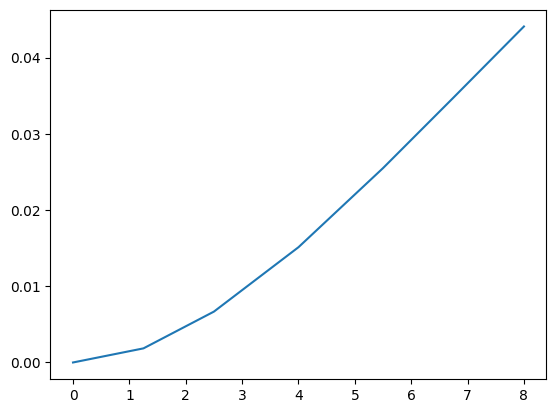

In [ ]:
pt.plot(nodal_data[:,1],U7y2)

## Answer(a)

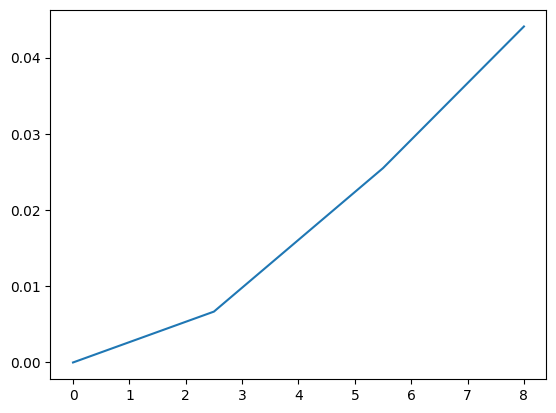

In [ ]:
pt.plot(nodal_data[:,1],U7y)

In [ ]:
# Choosing Linear Bar Element
ndof, nnodcon = 2, 2

# Unit length bar discretized with 5 elements
L, nel = 8, 6

# Create nodal data array
#nodal_data = np.zeros([nel+1, 2])
#for i in range(nel+1):
#   nodal_data[i, 0] = i
#   nodal_data[i, 1] = i*L/nel
nodal_data = np.zeros([nel+1, 2])
nodal_data[1,:]=np.array([1,2.5/2])
nodal_data[2,:]=np.array([2,2.5])
nodal_data[3,:]=np.array([3,2.5+3/2])
nodal_data[4,:]=np.array([4,2.5+3])
nodal_data[5,:]=np.array([5,5.5+2.5/2])
nodal_data[6,:]=np.array([6,5.5+2.5])

# Define Geometry parameters E,A
E, I1,I2 = 200e9, 1.604e-4,3.705e-4

# Size of element connectivity array is 3*nnodcon+2
eleconnect = np.zeros([nel, (1 + (nnodcon * 3) + 1)])
for i in range(nel):
  if i>3:
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I2     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I2    # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2
  else:
    eleconnect[i, 0] = i       # Element Number
    eleconnect[i, 1] = i       # Left node for element
    eleconnect[i, 2] = i + 1   # Right node for element
    eleconnect[i, 3] = E*I1     # EA or the correct value at the left node
    eleconnect[i, 4] = E*I1     # EA or the correct value at the right node
    eleconnect[i, 5] = 0       # hP or the correct value at the left node         # for conduction problem hp will be there
    eleconnect[i, 6] = 0       # hP or the correct value at the right node
    eleconnect[i, 7] = 2       # Gauss points for numerical integration


# Fixed degrees of freedom for bar
fixeddofs = np.array([[0 , 1,1, 0,  0 ]])
l1 =np.array([[2,5,4000,2],[2,4,4000,2],[1,2,8000,0],[1,2,0,-4000],[3,7,741000,0]])  # E*I2*0.01=741000


In [ ]:
Up3, Stp3 = Fem_1D(ndof, nodal_data, nnodcon, eleconnect, fixeddofs, l1, shape_beamln,beam_load)

<ipython-input-13-bbdcfd4b5491>:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i]=U[2*i]
<ipython-input-13-bbdcfd4b5491>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Us[i]=U[2*i+1]


In [ ]:
Up3

array([[0.        ],
       [0.        ],
       [0.00174528],
       [0.00264633],
       [0.00625052],
       [0.00441594],
       [0.01403748],
       [0.00584979],
       [0.02360121],
       [0.00678495],
       [0.03217575],
       [0.00690795],
       [0.04082717],
       [0.00692553]])

In [ ]:
U7y3=np.zeros(nel+1)
U7s3 = np.zeros(nel+1)
for i in range(len(U7y3)):
  U7y3[i]=Up3[2*i]
for i in range(len(U7s3)):
  U7s3[i]=Up3[2*i+1]

<ipython-input-238-c72ca50c1db7>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7y3[i]=Up3[2*i]
<ipython-input-238-c72ca50c1db7>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U7s3[i]=Up3[2*i+1]


In [ ]:
U7y3

array([0.        , 0.00174528, 0.00625052, 0.01403748, 0.02360121,
       0.03217575, 0.04082717])

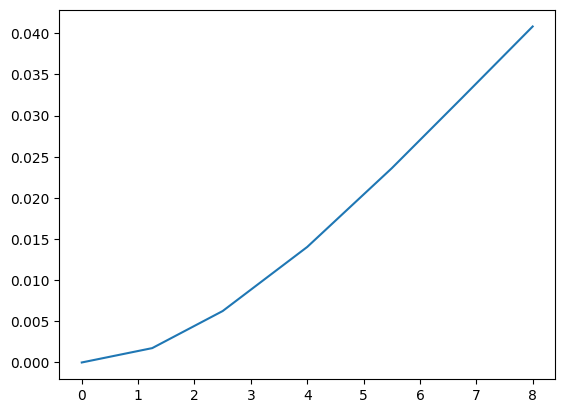

In [ ]:
pt.plot(nodal_data[:,1],U7y3)